# problem statement:
    Create a model that can predict the species of penguins based on physical attibutes,Then we can use that model toclassify the penguins.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df2=pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\penguins_size.csv')
df2.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Describing the data fields
Species:type of species:(Adelie	,chintrap,Gentoo)

sex:male of Female

Culmen length: body length from the nect till tows(vertical length)

culmen depth: body length(Horizontal length)

flipper length: the flaps length or hands length

body_Mass: weight 

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df2.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df2['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [8]:
df2['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [9]:
df2['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [38]:
df2=df2[df2['sex']!='.']
df2.shape

(343, 7)

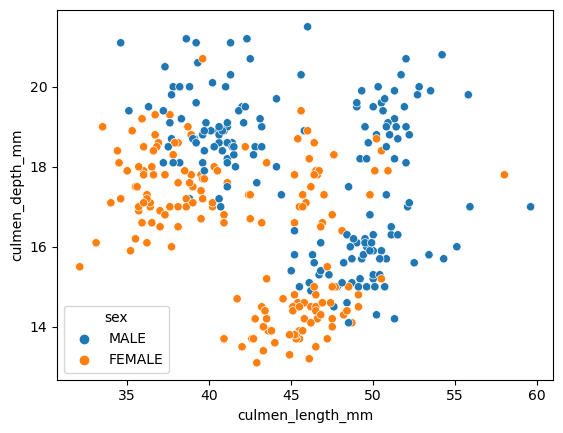

In [12]:
sns.scatterplot(data=df2,x='culmen_length_mm',y='culmen_depth_mm',hue='sex')
plt.show()

We can see from the graph that the Male penguins have higher culmen length and depth.

Most of the Female penguins have legth less than 50mm and depth of in range 16-18

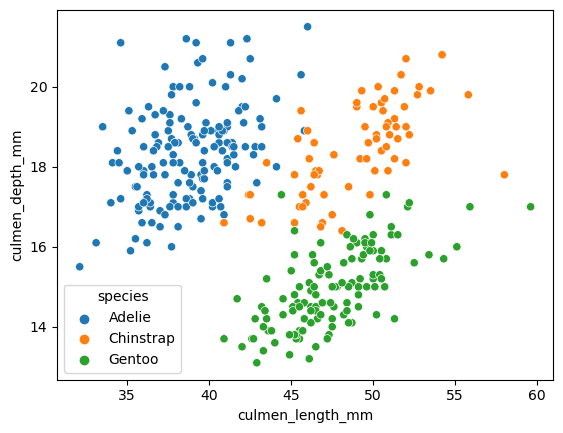

In [13]:
sns.scatterplot(data=df2,x='culmen_length_mm',y='culmen_depth_mm',hue='species')
plt.show()

This graph shows the culmen vs depth length of the penguins Chintrap have the highest culmen length and depth

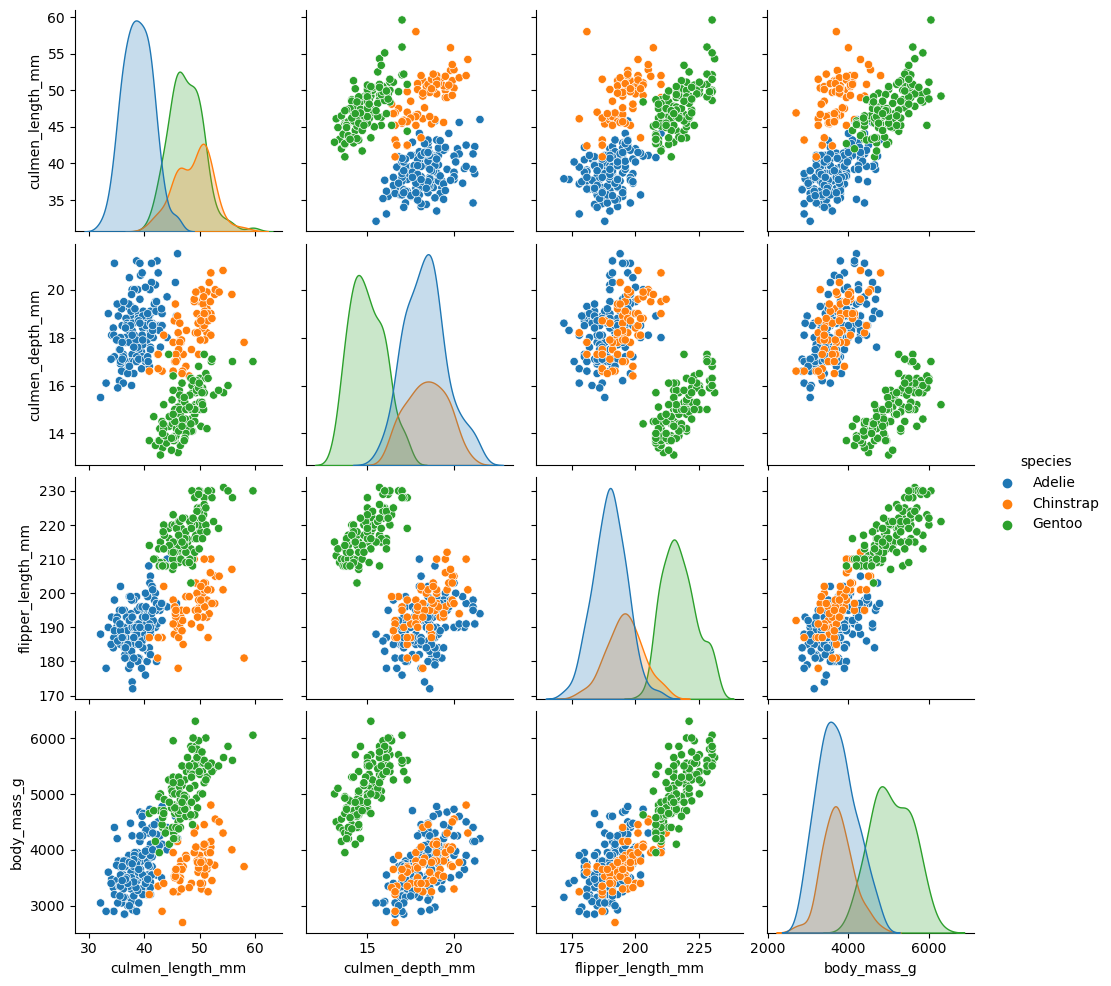

In [15]:
sns.pairplot(data=df2,hue='species')
plt.show()

# checking the NULL values

In [39]:
df2.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
si=SimpleImputer(strategy='mean')

In [6]:
df2['culmen_length_mm']=si.fit_transform(df2[['culmen_length_mm']])

In [7]:
df2.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df2['culmen_depth_mm']=si.fit_transform(df2[['culmen_depth_mm']])

In [9]:
df2['flipper_length_mm']=si.fit_transform(df2[['flipper_length_mm']])

In [10]:
df2['body_mass_g']=si.fit_transform(df2[['body_mass_g']])

In [11]:
si=SimpleImputer(strategy='most_frequent')

In [12]:
df2['sex']=si.fit_transform(df2[['sex']])

In [13]:
df2.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
x=df2.drop(columns='species',axis=1)
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...
339,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


# Encoding

In [15]:
df2 = pd.get_dummies(df2,columns=['island'],drop_first=True)
df2.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,39.10000,18.70000,181.000000,3750.000000,MALE,0,1
1,Adelie,39.50000,17.40000,186.000000,3800.000000,FEMALE,0,1
2,Adelie,40.30000,18.00000,195.000000,3250.000000,FEMALE,0,1
3,Adelie,43.92193,17.15117,200.915205,4201.754386,MALE,0,1
4,Adelie,36.70000,19.30000,193.000000,3450.000000,FEMALE,0,1


In [16]:
df2 = pd.get_dummies(df2,columns=['sex'],drop_first=True)
df2.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.10000,18.70000,181.000000,3750.000000,0,1,0,1
1,Adelie,39.50000,17.40000,186.000000,3800.000000,0,1,1,0
2,Adelie,40.30000,18.00000,195.000000,3250.000000,0,1,1,0
3,Adelie,43.92193,17.15117,200.915205,4201.754386,0,1,0,1
4,Adelie,36.70000,19.30000,193.000000,3450.000000,0,1,1,0


# spliting the dataset

In [17]:
x=df2.drop(columns='species',axis=1)
y=df2['species']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240, 8), (104, 8), (240,), (104,))

# Modeling

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model=DecisionTreeClassifier(random_state=9)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=9)

In [21]:
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

# Evaluation

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_train,y_train_pred)

1.0

In [25]:
accuracy_score(y_test,y_test_pred)

0.9615384615384616

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


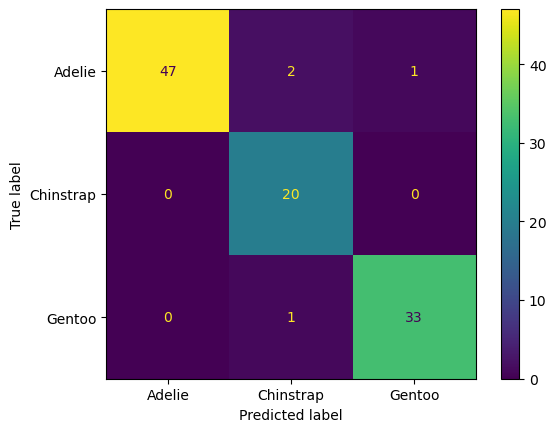

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        50
   Chinstrap       0.87      1.00      0.93        20
      Gentoo       0.97      0.97      0.97        34

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



# how to visulalize the tree

In [28]:
from sklearn.tree import plot_tree

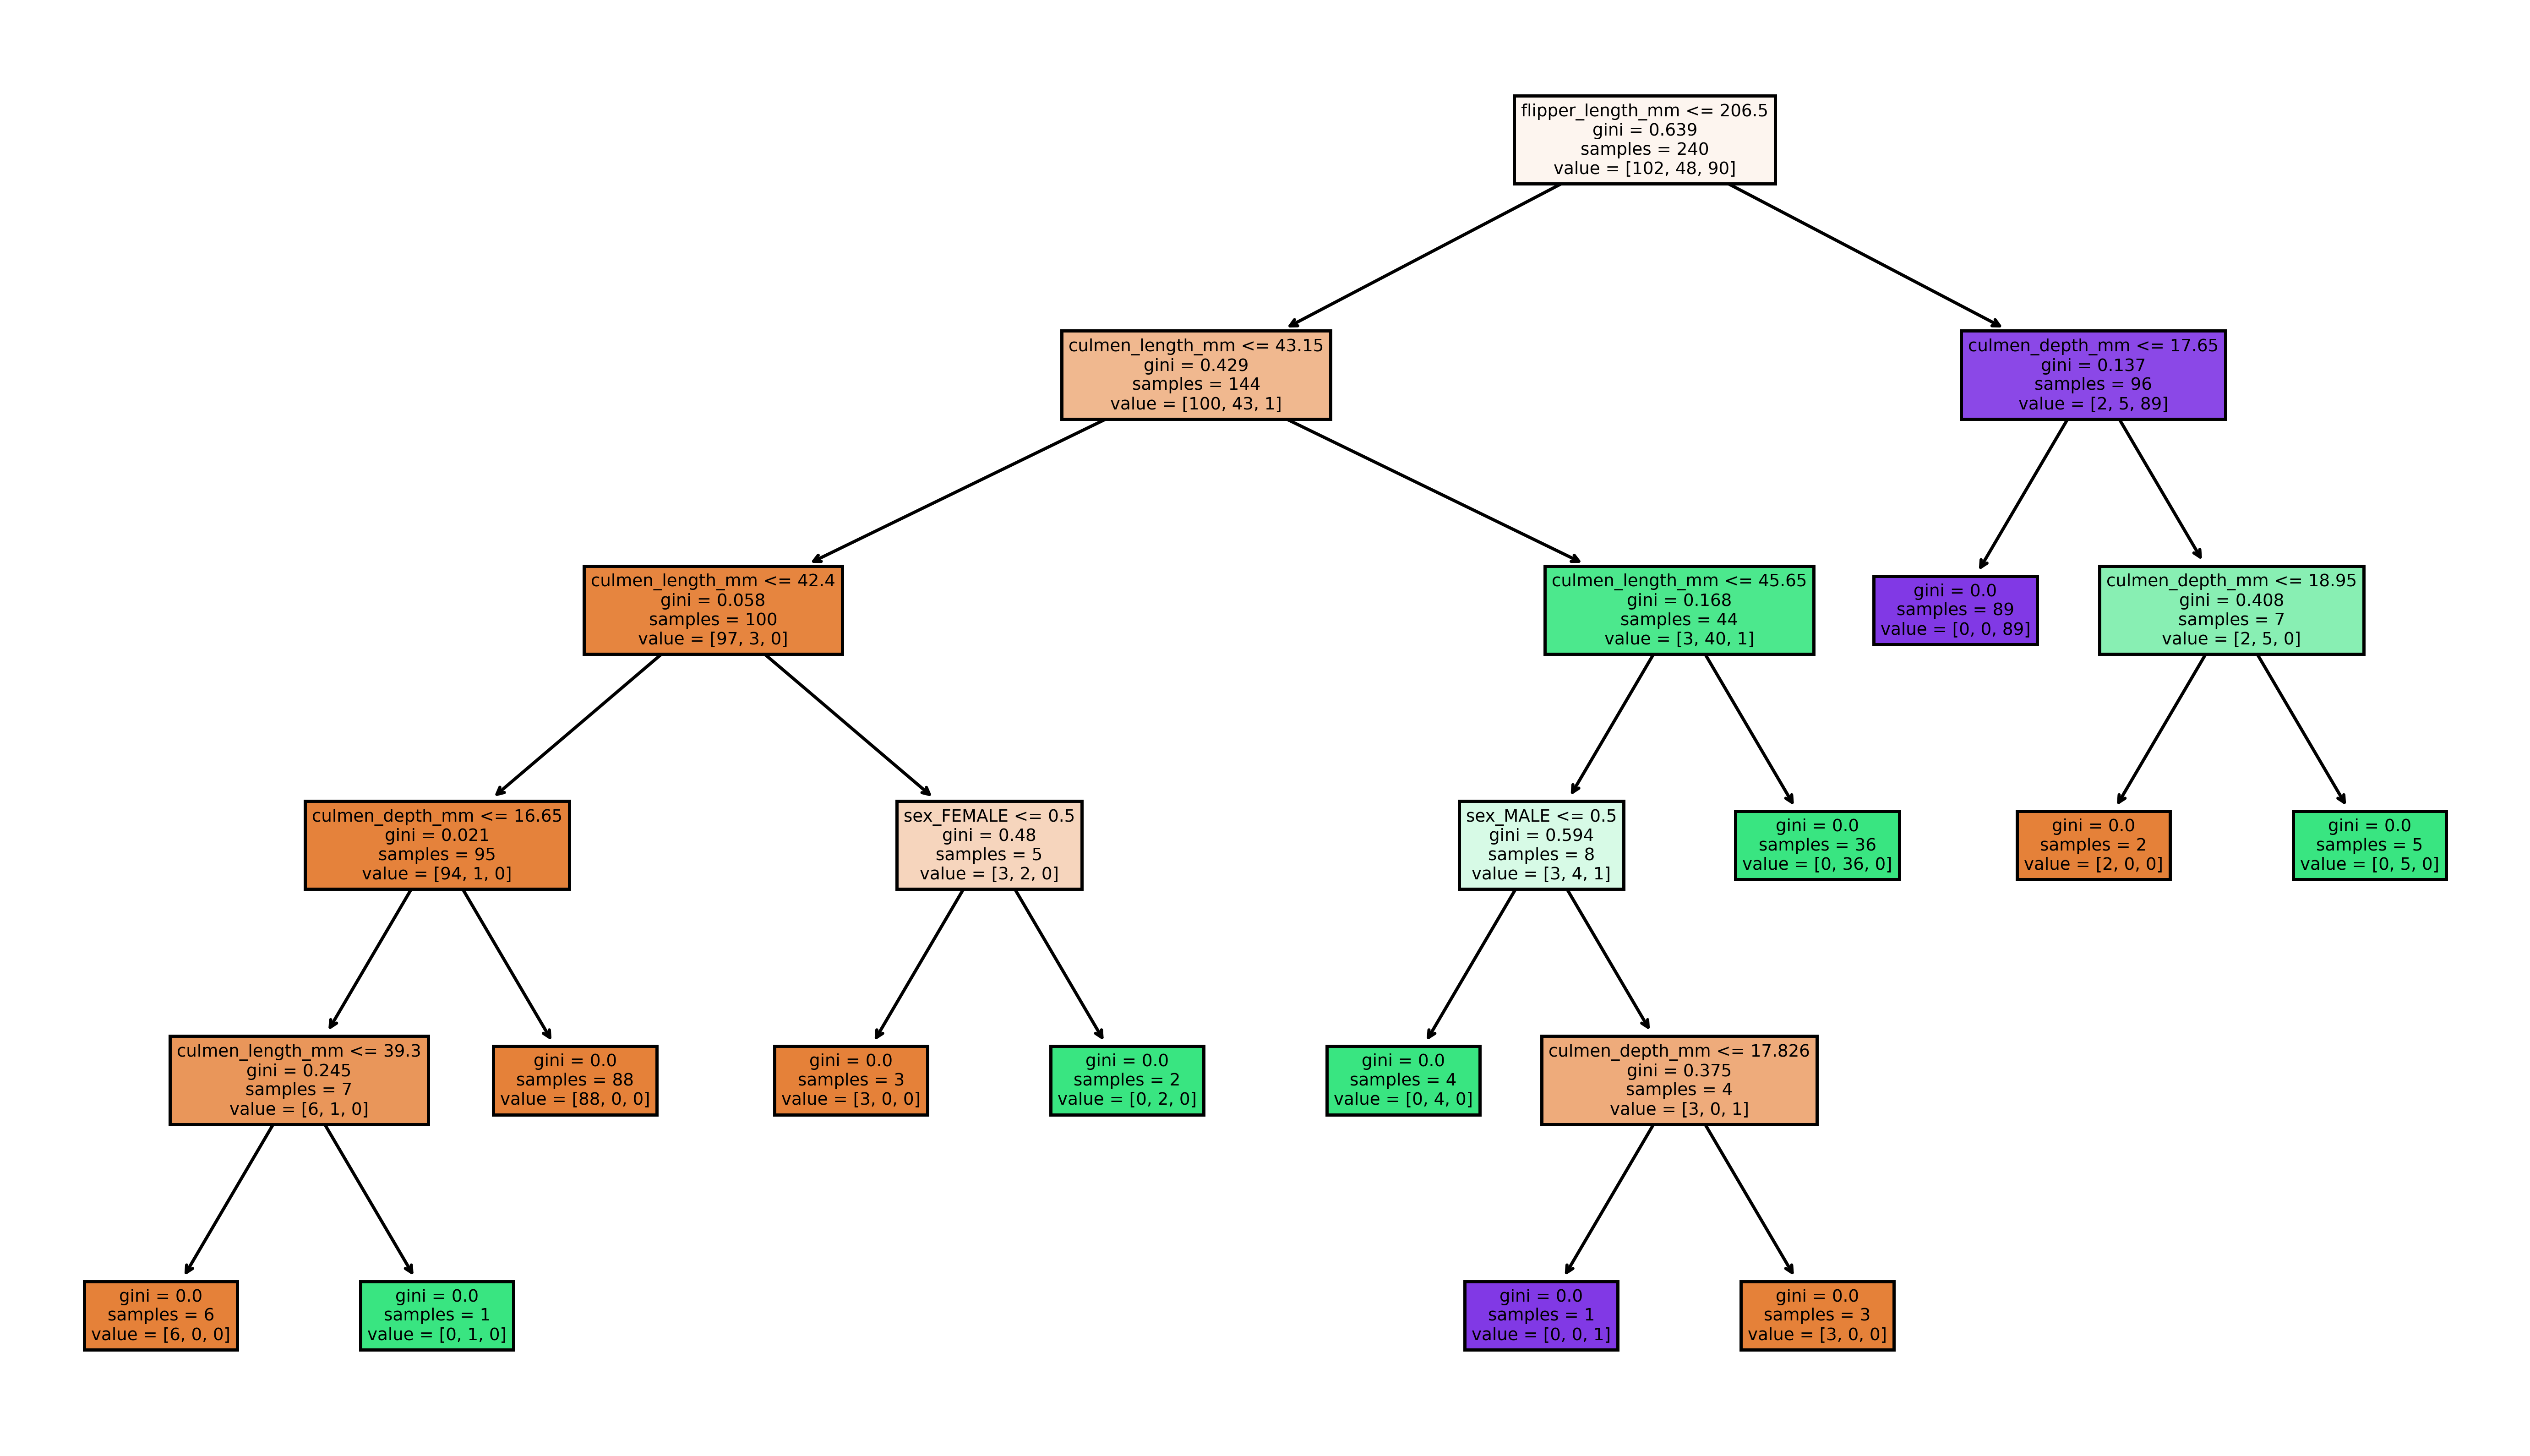

In [39]:
plt.figure(figsize=(14,8),dpi=500)
plot_tree(model,filled=True,feature_names=x.columns)
plt.show()

# Restricting The tree:

In [49]:
puned_tree=DecisionTreeClassifier(max_leaf_nodes=3,random_state=9)
puned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=9)

In [50]:
y_test_pred=puned_tree.predict(x_test)
y_train_pred=puned_tree.predict(x_train)

In [51]:
accuracy_score(y_train,y_train_pred)

0.9416666666666667

In [52]:
accuracy_score(y_test,y_test_pred)

0.9423076923076923

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.92      0.95        50
   Chinstrap       0.79      0.95      0.86        20
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.94       104
   macro avg       0.92      0.95      0.93       104
weighted avg       0.95      0.94      0.94       104



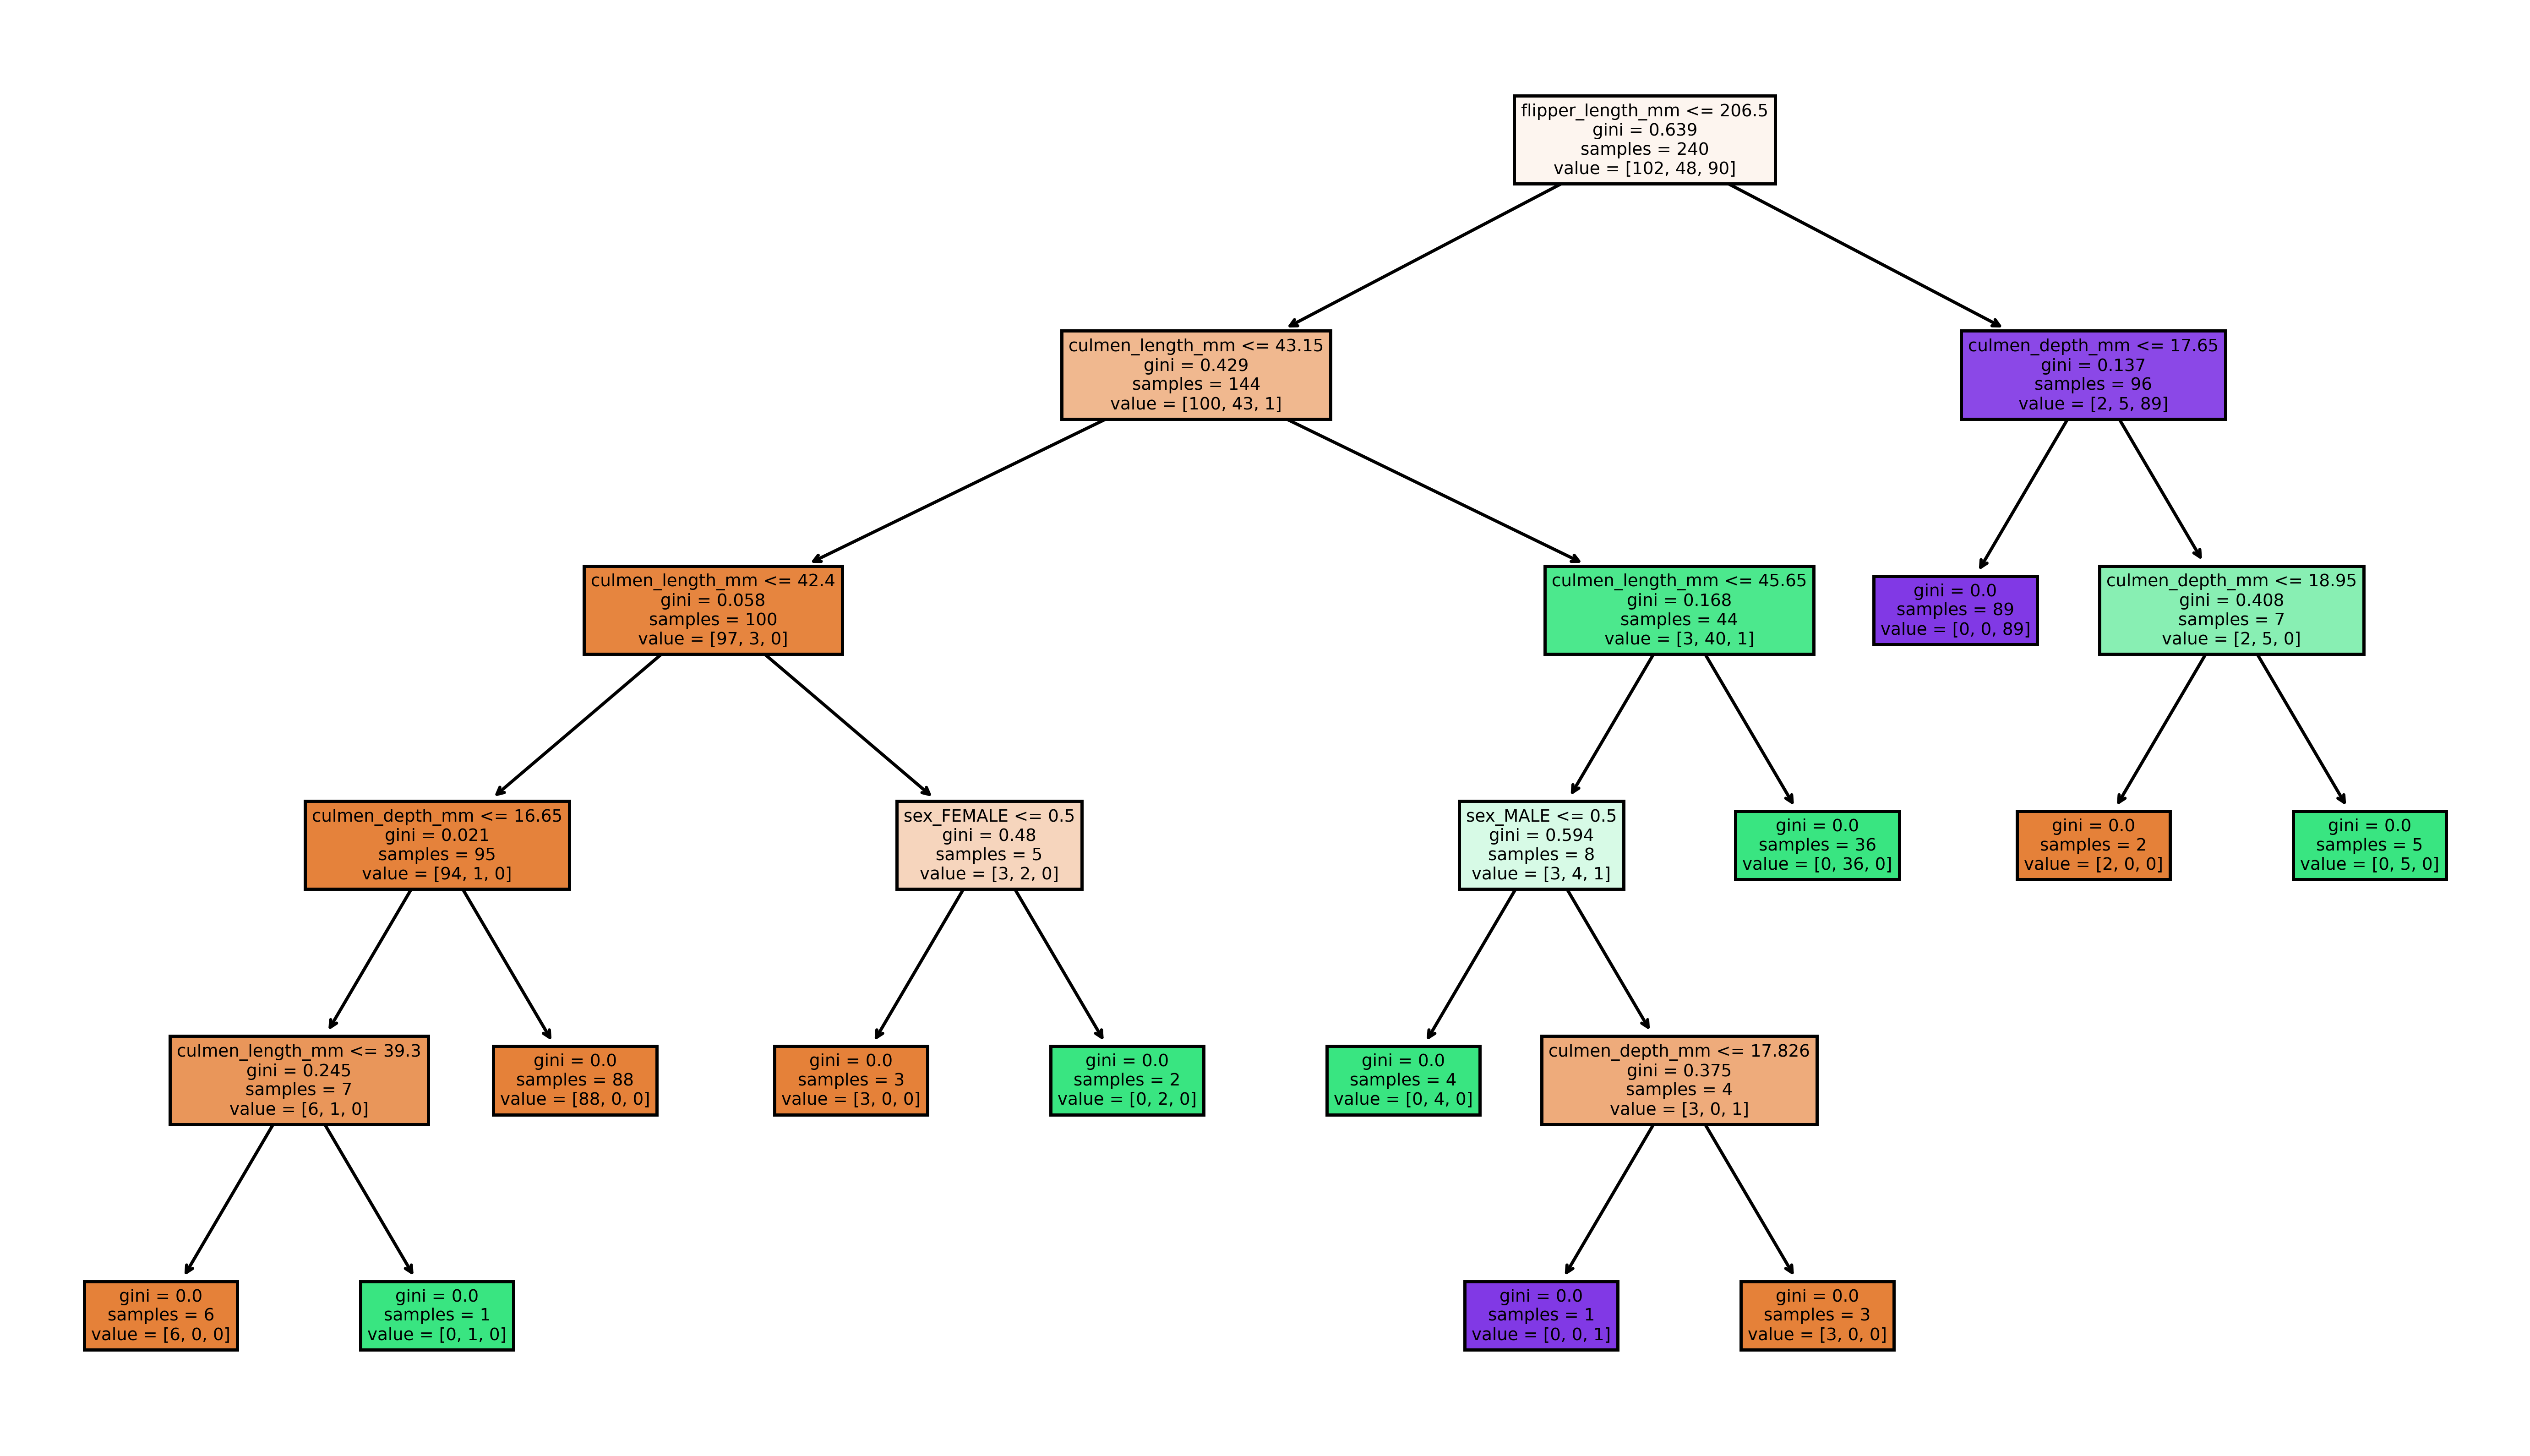

In [54]:
plt.figure(figsize=(14,8),dpi=500)
plot_tree(model,filled=True,feature_names=x.columns)
plt.show()